In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
bra_full = pd.read_csv('/content/campeonato-brasileiro-full.csv', sep=',')
bra_camp = pd.read_csv('/content/campoes_brasileiro.csv', sep=',')

In [5]:
bra_full.head()

,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor
0,1,2000-07-29,16h00,Sábado,Fluminense,Bahia,Fluminense,Maracanã,2,0,RJ,BA,RJ
1,1,2000-07-29,16h00,Sábado,Vasco,Sport,Sport,São Januário,0,2,RJ,PE,PE
2,1,2000-07-29,16h00,Sábado,Vitória,Palmeiras,Vitória,Barradão,4,1,ES,SP,ES
3,1,2000-07-30,17h00,Domingo,Botafogo-RJ,Atlético-MG,-,Caio Martins,0,0,RJ,MG,-
4,1,2000-07-30,18h30,Domingo,Juventude,Flamengo,-,Alfredo Jaconi,1,1,RS,RJ,-


In [6]:
bra_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8319 entries, 0 to 8318
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rodada            8319 non-null   object
 1   Data              8319 non-null   object
 2   Horário           7962 non-null   object
 3   Dia               8319 non-null   object
 4   Mandante          8319 non-null   object
 5   Visitante         8319 non-null   object
 6   Vencedor          8319 non-null   object
 7   Arena             8319 non-null   object
 8   Mandante Placar   8319 non-null   int64 
 9   Visitante Placar  8319 non-null   int64 
 10  Estado Mandante   8319 non-null   object
 11  Estado Visitante  8319 non-null   object
 12  Estado Vencedor   8319 non-null   object
dtypes: int64(2), object(11)
memory usage: 845.0+ KB


In [7]:
bra_full.isna().sum()

Rodada                0
Data                  0
Horário             357
Dia                   0
Mandante              0
Visitante             0
Vencedor              0
Arena                 0
Mandante Placar       0
Visitante Placar      0
Estado Mandante       0
Estado Visitante      0
Estado Vencedor       0
dtype: int64

In [8]:
# Deixando apenas as colunas necessárias para a análise

In [9]:
bra_full.drop('Horário', axis=1, inplace=True)


In [10]:
bra_full['Data'] = bra_full['Data'].apply(lambda x: x.split('-')[0])
bra_full['Data'] = bra_full['Data'].apply(lambda x: x.split('-')[0]).replace('2021','2020')
bra_full['Ano'] = bra_full['Data'].apply(lambda x: x.split('-')[0])
bra_full['Ano']

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
8314    2020
8315    2020
8316    2020
8317    2020
8318    2020
Name: Ano, Length: 8319, dtype: object

In [11]:
# Transformando a coluna Data para datetime
bra_full['Data'] = pd.to_datetime(bra_full['Data'])

In [12]:
# Criando a coluna ano
bra_full['Ano'] = pd.DatetimeIndex(bra_full['Data']).year

In [13]:
# Selecionando as colunas de interesse
bra_full = bra_full[['Ano', 'Vencedor']]

In [14]:
# Selecionando apenas os valores em que teve vencedor
bra_full = bra_full[bra_full['Vencedor'] != '-']

In [15]:
# Criando o campo de vitórias por ano
bra_full['Vitorias'] = bra_full.groupby(['Ano','Vencedor'])['Vencedor'].transform('count')

In [16]:
# Removendo os valores duplicados
bra_full = bra_full.drop_duplicates(subset=['Ano','Vencedor','Vitorias'], keep='first')

In [17]:
bra_full

,Ano,Vencedor,Vitorias
0,2000,Fluminense,12
1,2000,Sport,12
2,2000,Vitória,9
6,2000,Athlético-PR,11
7,2000,Gama,6
...,...,...,...
7974,2020,Botafogo-RJ,5
7975,2020,Corinthians,13
7981,2020,Goiás,9
7985,2020,Coritiba,7


In [18]:
# Padronizando os nomes dos clubes
bra_full['Vencedor'] = bra_full['Vencedor'].replace(['SANTOS','FLUMINENSE','VASCO','CRUZEIRO','CORINTHIANS','SPORT','portuguesa','FLAMENGO','PONTE PRETA','INTERNACIONAL','PALMEIRAS'],['Santos','Fluminense','Vasco','Cruzeiro','Corinthians','Sport','Portuguesa','Flamengo','Ponte Preta','Internacional','Palmeiras'])

In [19]:
# Ajustando a tabela do campeonato de 2020 que se extendeu ao ano de 2021
bra_full['Ano'] = bra_full['Ano'].replace('2021','2020')

In [20]:
# Identificando os maiores vencedores de cada ano
bra_full = bra_full.loc[bra_full.groupby('Ano')['Vitorias'].idxmax()]
bra_full

,Ano,Vencedor,Vitorias
0,2000,Fluminense,12
343,2001,Athlético-PR,20
719,2002,São Paulo,16
1070,2003,Cruzeiro,30
1627,2004,Santos,26
2193,2005,Corinthians,24
2628,2006,São Paulo,22
3001,2007,São Paulo,23
3383,2008,Grêmio,21
3767,2009,Internacional,19


In [21]:
# Renomeando a coluna Vencedor
bra_full.rename(columns={'Vencedor': 'Clube_Vitorias'}, inplace = True)

In [22]:
bra_camp.head()

,Ano,Vencedor,Vice,Terceiro colocado,Quarto colocado,Artilheiro(s),Gols
0,1959,Bahia,Santos,Grêmio,Vasco da Gama,Léo Briglia (Bahia),8
1,1960,Palmeiras,Fortaleza,Fluminense,Santa Cruz,Bececê (Fortaleza),7
2,1961,Santos,Bahia,America,Náutico,Pelé (Santos),7
3,1962,Santos,Botafogo,Internacional,Sport,Coutinho (Santos),7
4,1963,Santos,Bahia,Grêmio,Botafogo,Pelé (Santos),8


In [23]:
# Filtrando os anos a partir de 2000
bra_camp_ano = bra_camp['Ano'] >= 2000
filtro_camp = bra_camp.loc[bra_camp_ano]
print(filtro_camp)

     Ano     Vencedor  ...                                      Artilheiro(s) Gols
43  2000        Vasco  ...                              Adhemar (São Caetano)   22
44  2001     Atlético  ...                            Romário (Vasco da Gama)   21
45  2002       Santos  ...    Luís Fabiano (São Paulo) Rodrigo Fabri (Grêmio)   19
46  2003     Cruzeiro  ...                                      Dimba (Goiás)   31
47  2004       Santos  ...                   Washington (Atlético Paranaense)   34
48  2005  Corinthians  ...                            Romário (Vasco da Gama)   22
49  2006          São  ...                                      Souza (Goiás)   17
50  2007          São  ...                                    Josiel (Paraná)   20
51  2008          São  ...  Keirrison (Coritiba) Kléber Pereira (Santos) W...   21
52  2009     Flamengo  ...  Adriano (Flamengo) Diego Tardelli (Atlético Mi...   19
53  2010   Fluminense  ...                                     Jonas (Grêmio)   23
54  

In [24]:
# Incluindo na coluna apenas valores acima de 2000
bra_camp['Ano'] = filtro_camp

In [25]:
# Retirando os anos antes de 2000
bra_camp.dropna(inplace= True)

In [26]:
# Convertendo o tipo da coluna em numero inteiro
bra_camp.astype({'Ano': 'int64'}).dtypes

Ano                   int64
Vencedor             object
Vice                 object
Terceiro colocado    object
Quarto colocado      object
Artilheiro(s)        object
Gols                  int64
dtype: object

In [27]:
# Definindo as colunas de interesse
bra_camp = bra_camp[['Ano', 'Vencedor', 'Vice']]
bra_camp

,Ano,Vencedor,Vice
43,2000,Vasco,São Caetano
44,2001,Atlético,São Caetano
45,2002,Santos,Corinthians
46,2003,Cruzeiro,Santos
47,2004,Santos,Atlético Paranaense
48,2005,Corinthians,Internacional
49,2006,São,Internacional
50,2007,São,Santos
51,2008,São,Grêmio
52,2009,Flamengo,Internacional


In [28]:
# Ajustando os valores das colunas Vencedor e Vice
bra_camp['Vencedor'] = bra_camp['Vencedor'].replace(['São'],'São Paulo')
bra_camp['Vencedor'] = bra_camp['Vencedor'].replace(['Atlético'],'Athlético-PR')
bra_camp['Vice'] = bra_camp['Vice'].replace(['Atlético Paranaense'],'Athlético-PR')

In [29]:
bra_camp

,Ano,Vencedor,Vice
43,2000,Vasco,São Caetano
44,2001,Athlético-PR,São Caetano
45,2002,Santos,Corinthians
46,2003,Cruzeiro,Santos
47,2004,Santos,Athlético-PR
48,2005,Corinthians,Internacional
49,2006,São Paulo,Internacional
50,2007,São Paulo,Santos
51,2008,São Paulo,Grêmio
52,2009,Flamengo,Internacional


In [30]:
# Juntando as duas tabelas
camp = pd.merge(bra_full, bra_camp, on='Ano')

In [31]:
# Incluindo o campeão e o vice de 2020
camp = camp.append({'Ano': 2020, 'Clube_Vitorias': 'Flamengo', 'Vitorias': 21, 'Vencedor': 'Flamengo', 'Vice': 'Internacional'}, ignore_index=True)

In [32]:
camp

,Ano,Clube_Vitorias,Vitorias,Vencedor,Vice
0,2000,Fluminense,12,Vasco,São Caetano
1,2001,Athlético-PR,20,Athlético-PR,São Caetano
2,2002,São Paulo,16,Santos,Corinthians
3,2003,Cruzeiro,30,Cruzeiro,Santos
4,2004,Santos,26,Santos,Athlético-PR
5,2005,Corinthians,24,Corinthians,Internacional
6,2006,São Paulo,22,São Paulo,Internacional
7,2007,São Paulo,23,São Paulo,Santos
8,2008,Grêmio,21,São Paulo,Grêmio
9,2009,Internacional,19,Flamengo,Internacional


In [34]:
# Verificando a combinação entre o clube com maior vitória, o campeão, vice e as demais colocações
camp1 = camp.apply(lambda row: all(i in row.Vencedor for i in row.Clube_Vitorias), axis=1)
camp2 = camp1.groupby([camp['Clube_Vitorias'], camp['Vencedor']]).sum().astype(int).reset_index(name='matches')
camp3 = camp.apply(lambda row: all(i in row.Vice for i in row.Clube_Vitorias), axis=1)
camp4 = camp3.groupby([camp['Clube_Vitorias'], camp['Vice']]).sum().astype(int).reset_index(name='matches')

In [35]:
# identificar a quantidade de clubes com maior vitória que foram campeões, vice ou ficou em outra posição na tabela  
matches1 = camp2['matches'].sum()
matches2 = camp4['matches'].sum()
total_match = camp['Vencedor'].value_counts().sum()
matches3 = total_match - (matches1 + matches2)

In [36]:
# Definir a porcentagem dos clubes com maior vitória que foram campeões, vice ou ficou em outra posição na tabela
match_per1 = (matches1 / total_match) * 100
match_per1 = round(match_per1)
match_per2 = (matches2 / total_match) * 100
match_per2 = round(match_per2)
match_per3 = (matches3 / total_match) * 100
match_per3 = round(match_per3)


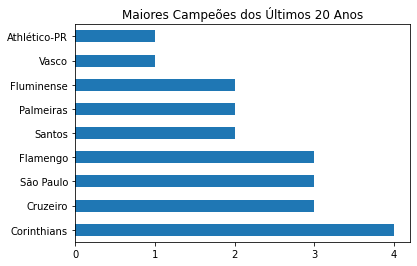

In [37]:
## Análise Gráfica dos maiores vencedores dos últimos 20 anos
freq = camp['Vencedor'].value_counts(sort=True)
freq.plot.barh()
plt.title('Maiores Campeões dos Últimos 20 Anos')
plt.xticks(range(0, 5, 1))
plt.show()

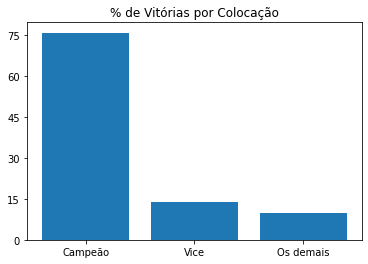

In [38]:
# Gráfico da porcentagem de vitórias por colocação
labels = ['Campeão', 'Vice', 'Os demais']
bra_means = [match_per1, match_per2, match_per3]
fig, ax = plt.subplots()
ax.bar(labels, bra_means)
ax.set_title('% de Vitórias por Colocação')
ax.set_yticks(range(0, 80, 15))
plt.show()


In [39]:
# Os ultimos 10 anos os campeões foram o que tiveram a maior vitória, identificar a média de vitórias dos ultimos 10 anos.
mean = camp.loc[camp['Ano'] > 2010]
mean = mean['Vitorias'].mean()
mean

23.0